
# <center><font style="color:rgb(100,109,254)"> Opencv Fundamentals</font></center>



##  <font style="color:rgb(134,19,348)">Loading & displaying Image from disk</font>
To read an Image in Opencv you use the [```cv2.imread()```](https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) function, the image will be read as a numpy array
Usage:

> image = cv2.imread(filename, [flag])    

<i><small>The Square brackets i.e. [ ] are used to denote optional parameters</small> </i>

**Params:**
 - `filename:` Name of the image or path to the image.
 - `flag:` There are numerous flags but three most important ones are these: 0,1,-1
 
If you pass in `1` the image is read in Color, if `0` is passed the image is read in Grayscale (Black & white) and if `-1` is used to read transparent images which we will learn in the next chapter, If no parameter is passed the image will be read in Color. <br>

*Lets read an image and print it. *

In [ ]:
#this is how you import the Opencv Library
import cv2
#we are also gonna load the numpy library for later usage
import numpy as np
#we read our Image
img = cv2.imread('/content/drive/MyDrive/girls-739071_1280.jpg',0)
print(img)  # Can you guess which number we just printed

[[212 212 211 ... 101 111  92]
 [213 213 212 ... 116 138 118]
 [214 214 214 ... 186 115 113]
 ...
 [ 94  94  93 ...  20  20  19]
 [ 94  94  93 ...  20  20  20]
 [ 94  94  93 ...  19  19  19]]


Great, we have loaded the image in GrayScale , you can also call it a single channel image in which `0` represents black and `255` white color and all the numbers between `0` and `255` are different shades of gray. Since the above image has black background and `2` drawn with a white pen, you will only see only `0` and `255`


##  <font style="color:rgb(134,19,348)"> Shape of our Image</font>

You can see the shape of the Image by doing `img.shape`,  you can also count the columns and rows above

In [ ]:
# Note for a color image you will also see a 3rd parameter retured called Channels
img.shape # returns rows , columns  or  height , width  or x , y

(853, 1280)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



##  <font style="color:rgb(134,19,348)">Displaying Image with Matplotlib</font>

Printing Images is not fun, Lets see how we can display this image in the notebook with matplotlib which is a popular library for visualizing graphs

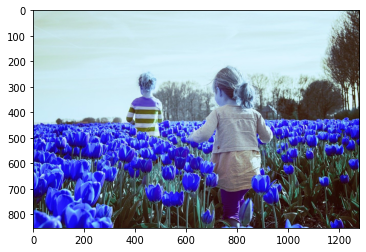

In [ ]:
# From matplotlib import pyplot the plotting module
import matplotlib.pyplot as plt
# This is the magic command which is tells the notebook we are gonna be displaying graphs with matplotlib
%matplotlib inline
# You can finally show the image with plt.imshow()
plt.imshow(img)

### Instead of Inline Static graphs, you can make interactive graphs by using notebook magic command**

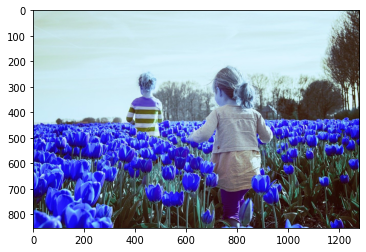

In [ ]:
%matplotlib notebook
# You can finally show the image with plt.imshow()
plt.imshow(img)
plt.show()

What just happened ? , our Image is shown in color but we know we loaded in grayscale, so the issue here is that matplotlib displays single channel images with the default color_map called Viridis, you can see it how viridis displays `0-255`
![viridis.PNG](attachment:viridis.PNG)

Now the color map for Grayscale image looks like this:
![gray.PNG](attachment:gray.PNG)

**Now we will explicitly tell matplotlib to set the color map to grayscale by setting `cmap='gray'`**

In [ ]:
plt.imshow(img,cmap='gray')

##  <font style="color:rgb(134,19,348)"> Display Color Image in Matplotlib
</font>


In [ ]:
#lets read a color image first.
img = cv2.imread('/content/drive/MyDrive/girls-739071_1280.jpg',1)   # remember to set the flag to 1 for color images (default is also 1)

In [ ]:
## lets see the Shape of our Image
img.shape

(853, 1280, 3)

See we have 344 columns , 535 rows and 3 channels , since we are using a color image we wil get 3 primary color channels Red, Green, Blue RGB, but instead of giving us RGB Opencv gives us channels in reverse i.e. BGR Blue, Green , Red.
![imgchannels.PNG](attachment:imgchannels.PNG)

With the Combination of these 3 Channels Any Color Can Be Created

![rgbmix.png](attachment:rgbmix.png)

*We will Discuss more about Image Channels in the next Tutorial*

###  <font style="color:rgb(134,19,348)"> Now We wil Display this Clown Image with Matplotlib
</font>

<br>

![party.jpg](attachment:party.jpg)

In [ ]:
plt.imshow(img)

What Just Happened here, why did our Colored image got corrupted and got this blueish makeup, the reason is simple, like I previously mentioned OpenCV displays image in BGR and matplotlib displays it in RGB. So we have to reverse our channels or transform bgr to rgb and OpenCV has just the function to that

> **image = cv2.cvtColor(src, COLOR_CONVERSION_FLAG)**

**Param:**

- `src:` Your Input Image
- `COLOR_CONVERSION_FLAG:` The color space you will convert to, for our purpose we will use `cv2.COLOR_BGR2RGB`

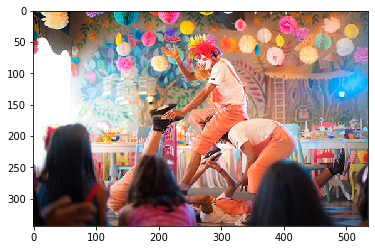

In [ ]:
RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

**Note:** There are many color spaces that you can convert to for e.g lets turn our bgr image to grayscale by using the flag `cv2.COLOR_BGR2RGB`

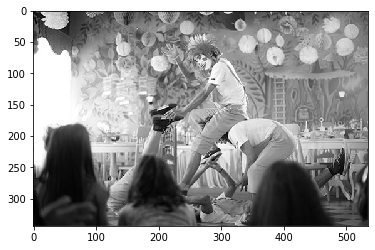

In [ ]:
GRAY_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(GRAY_image,cmap='gray')

We can also just reverse our image channels manually by putting `::-1` in the Channels instead of using the opencv function everytime we want to display our Image.

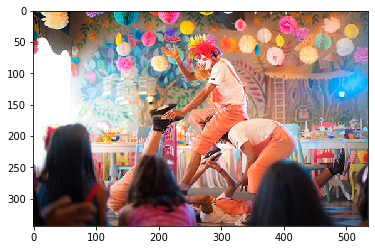

In [ ]:
# Remember the 3rd dimension are the channels, so we will just reverse that
plt.imshow(img[:,:,::-1]) # we can also do plt.imshow(img[...,::-1])

Notice the scale dimensions appear on each image , we can get rid of it like this:

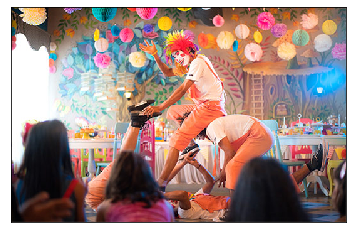

In [ ]:
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(img[...,::-1]);

##  <font style="color:rgb(134,19,348)"> Matplotlib Subplots
</font>

Just like matplotlib normal plots we can display multiple subplots in a single cell
You have to specify the number of rows, columns and the index of the subplot, for example we are going to display two image so we can either display 1 image per row , having 2 rows and 1 column or we can display 2 images per row having 1 row , 2 columns.

> **plt.subplot(n_rows,n_columns,index)**

**Params:**
- `n_rows:` Number of rows
- `n_columns:`Number of Columns
- `index:` The index of plot

> **plt.title(Title)**

- `Title:` The Title text of the subplot


Text(0.5, 1.0, 'Gray_Scale')

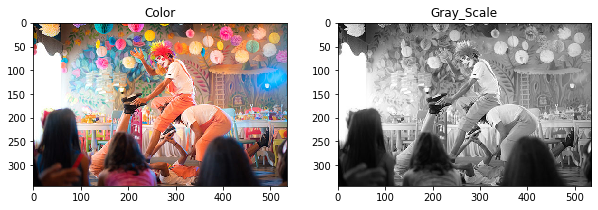

In [ ]:
# First we set the figure size we want to use
plt.figure(figsize=[10,10])

# If you're having less than 10 subplots you can skip the `,`
# 1 row,2 columns,index=1
plt.subplot(121) 
plt.imshow(img[...,::-1])
plt.title("Color")

# 1 row,2 columns,index=2
plt.subplot(122);
plt.imshow(GRAY_image,cmap='gray')
plt.title("Gray_Scale")

**Now Show images in 2 rows**

Text(0.5, 1.0, 'Gray_Scale')

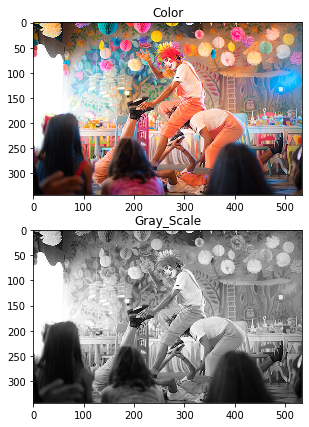

In [ ]:
# First we set the figure size we want to use
plt.figure(figsize=[7,7])

# If you're having less than 10 subplots you can skip the `,`
# 1 row,2 columns,index=1
plt.subplot(211) 
plt.imshow(img[...,::-1])
plt.title("Color")

# 1 row,2 columns,index=2
plt.subplot(212);
plt.imshow(GRAY_image,cmap='gray')
plt.title("Gray_Scale")